In [1]:
#importing all required library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#from sklearn.tree import DecisionTreeRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import PowerTransformer
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")


impoting all important libraries

In [2]:
#uploading dataset
df=pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


upload the dataset

In [3]:
#changing Dataset in Dataframe
df=pd.DataFrame(data=df)

# EDA

In [4]:
# top 5 rows of dataset
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


check top 5 rows of dataset

In [5]:
#name of column index
df.keys()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

checking the keys of dataset

In [6]:
df.Sex

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

checking the column detail 'Sex'

In [7]:
df["Rings"]

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

checking the value of 'Rings' column

In [8]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

checking the unique value of Rings column

In [9]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

checking the value count of 'Rings'

In [10]:
Age=df.Rings + 1.5
print (Age)

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Rings, Length: 4177, dtype: float64


here we are adding 1.5 in ring coulumn to get original age

In [11]:
# showing the frequeny of rings
df["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

finding the frequency of ring column

In [12]:
df.shape

(4177, 9)

Dataset has 4177 coulmns and 9 rows

In [13]:
df.dtypes
#only Sex in object value and remains are in float value and rings in integer value
#so we can use lable encoder in Sex column for further

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

only Sex in object value and remains are in float value and rings in integer value
so we can use lable encoder in Sex column for further

In [14]:
df.info()
#getting more info about dataset
#no null or missing values in data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


there is no null value or missing value in dataset

In [15]:
df.isnull()
#reverifing the null value again

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()
# total null value in dataset is 0

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

there is no null value in dataset

In [17]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


describe the dataset , Stastistics values

In [18]:
# we can see from description there is zero value in height
df["Height"]=df["Height"].replace(0,np.NaN)

In [19]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(np.NaN, strategy="median")
df["Height"]=imp.fit_transform(df["Height"].values.reshape(-1,1))

there is 0 value in Height column so we can use Simpleimputer to reshape this value

In [20]:
df.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


now we can see here no zero value in hight column

<AxesSubplot:>

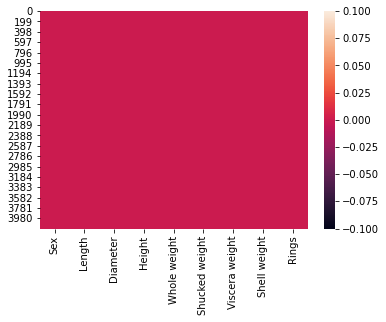

In [21]:
#once again checking null value through heat map
sns.heatmap(df.isnull())
#no null values are present

checking null value through heatmap, there is no null value

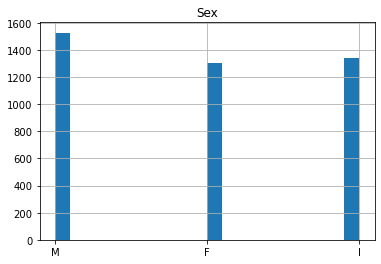

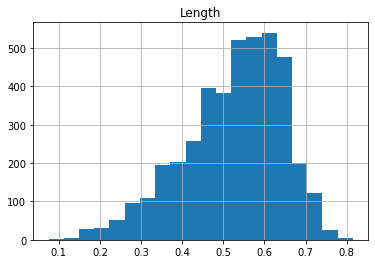

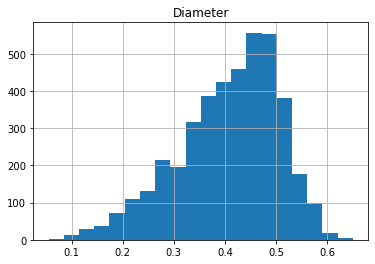

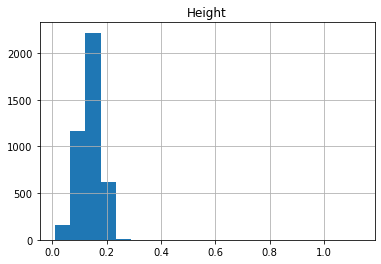

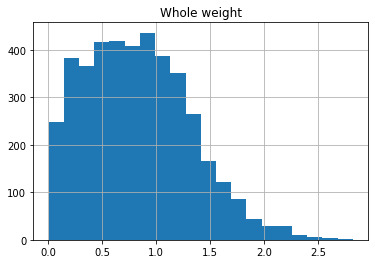

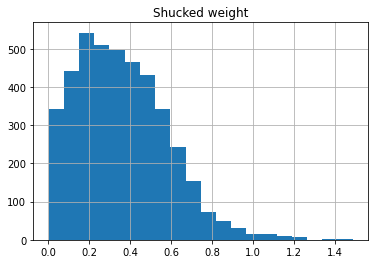

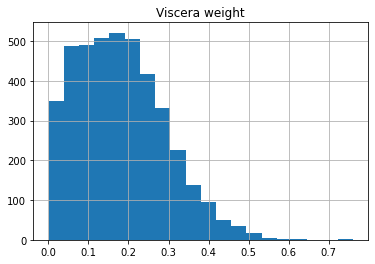

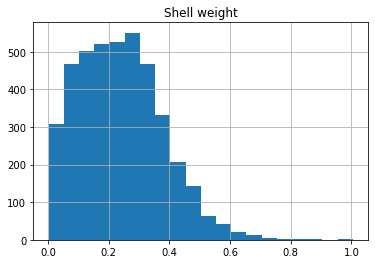

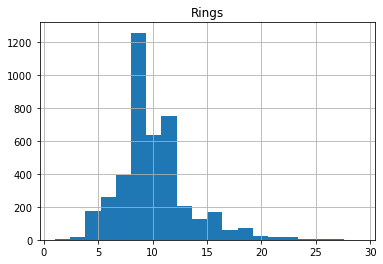

In [22]:
#using the below code creating histplot.
columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight", "Viscera weight", "Shell weight", "Rings"]

for i in df[columns]:
    plt.figure()
    plt.title(i)
    df[i].hist(bins=20)

check the histplot of all coulmn in same time

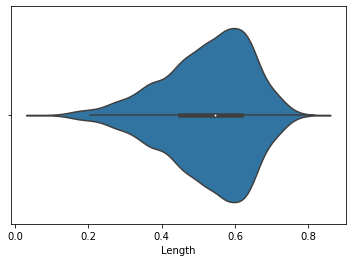

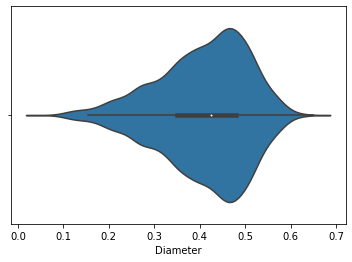

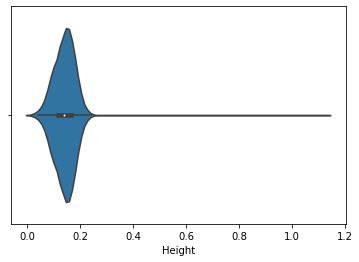

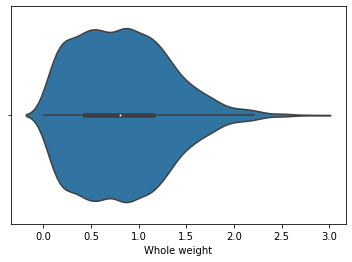

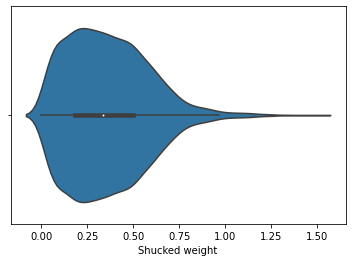

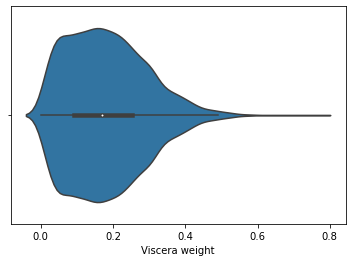

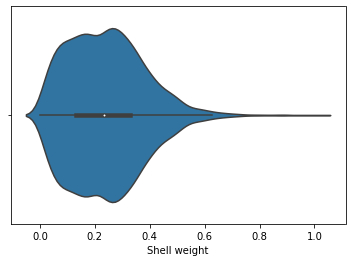

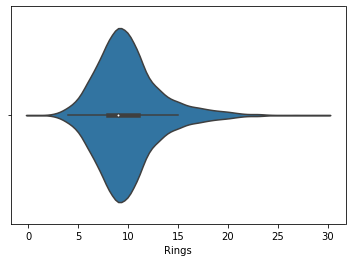

In [23]:
#using the below code creating violinplot.
columns = ["Length","Diameter","Height","Whole weight","Shucked weight", "Viscera weight", "Shell weight", "Rings"]

for i in df[columns]:
    plt.figure()
    sns.violinplot(df[i], data=df)

checking the violinplot in same time for all columns

<AxesSubplot:xlabel='Height', ylabel='Rings'>

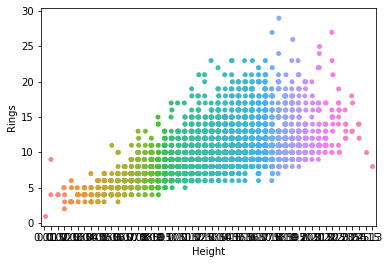

In [24]:
 sns.stripplot(data=df, x=df['Height'],y=df['Rings'])

In [25]:
#using the below code creating stripplot between all the key values
#columns = ["Sex","Diameter","Height","Whole weight","Viscera weight"]
#for i in df[columns]:
    #plt.figure()
    #sns.stripplot(data=df, x=df[i],y=df['Rings'])

<AxesSubplot:xlabel='Height', ylabel='Rings'>

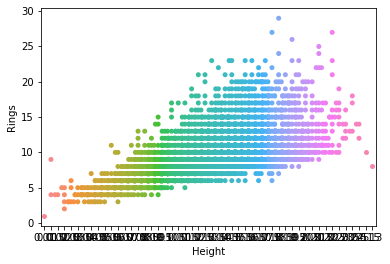

In [26]:
 sns.swarmplot(data=df, x=df['Height'], y=df['Rings'])

In [27]:
#sns.swarmplot(data=df, x=df['Viscera weight'], y=df['Rings']) it takes much time

In [28]:
#sns.lmplot(data=df, x=df['Whole weight'], y=df['Rings']) it takes much time

In [29]:
#sns.countplot(data=df, x=df['Height'], y=df['Rings']) it takes much time

In [30]:
#sns.countplot(data=df, x=df['Viscera weight'], y=df['Rings']) it takes much time

In [31]:
#sns.countplot(data=df, x=df['Viscera weight'], y=df['Rings']) it takes much time

# LabelEncoder

In [32]:
LE=LabelEncoder()
df["Sex"]=LE.fit_transform(df["Sex"])

df["Sex"]

#F--> 0
#I --> 1
#M--> 2

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

using labelEncoder to change Sex column in integer value

<AxesSubplot:>

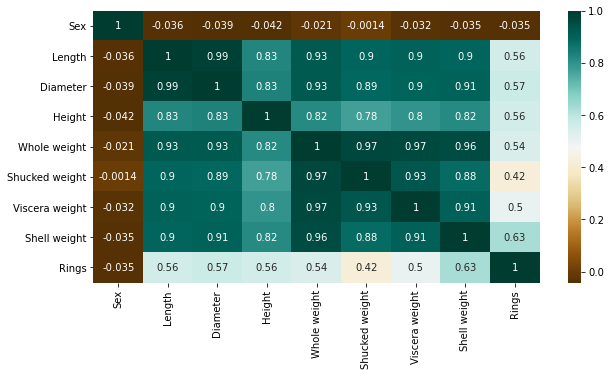

In [33]:
#lets check the correlation matrix
#method ("pearson")

fig=plt.figure(figsize=(10,5))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="BrBG")

#Length is heighly correlated with Diameter

# Dropping the Columns 

(label encoder value and correlation )

In [34]:
df_new=df.drop("Sex", axis=1)
df_new=df_new.drop("Length", axis=1)

In [35]:
df_new.head()

,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


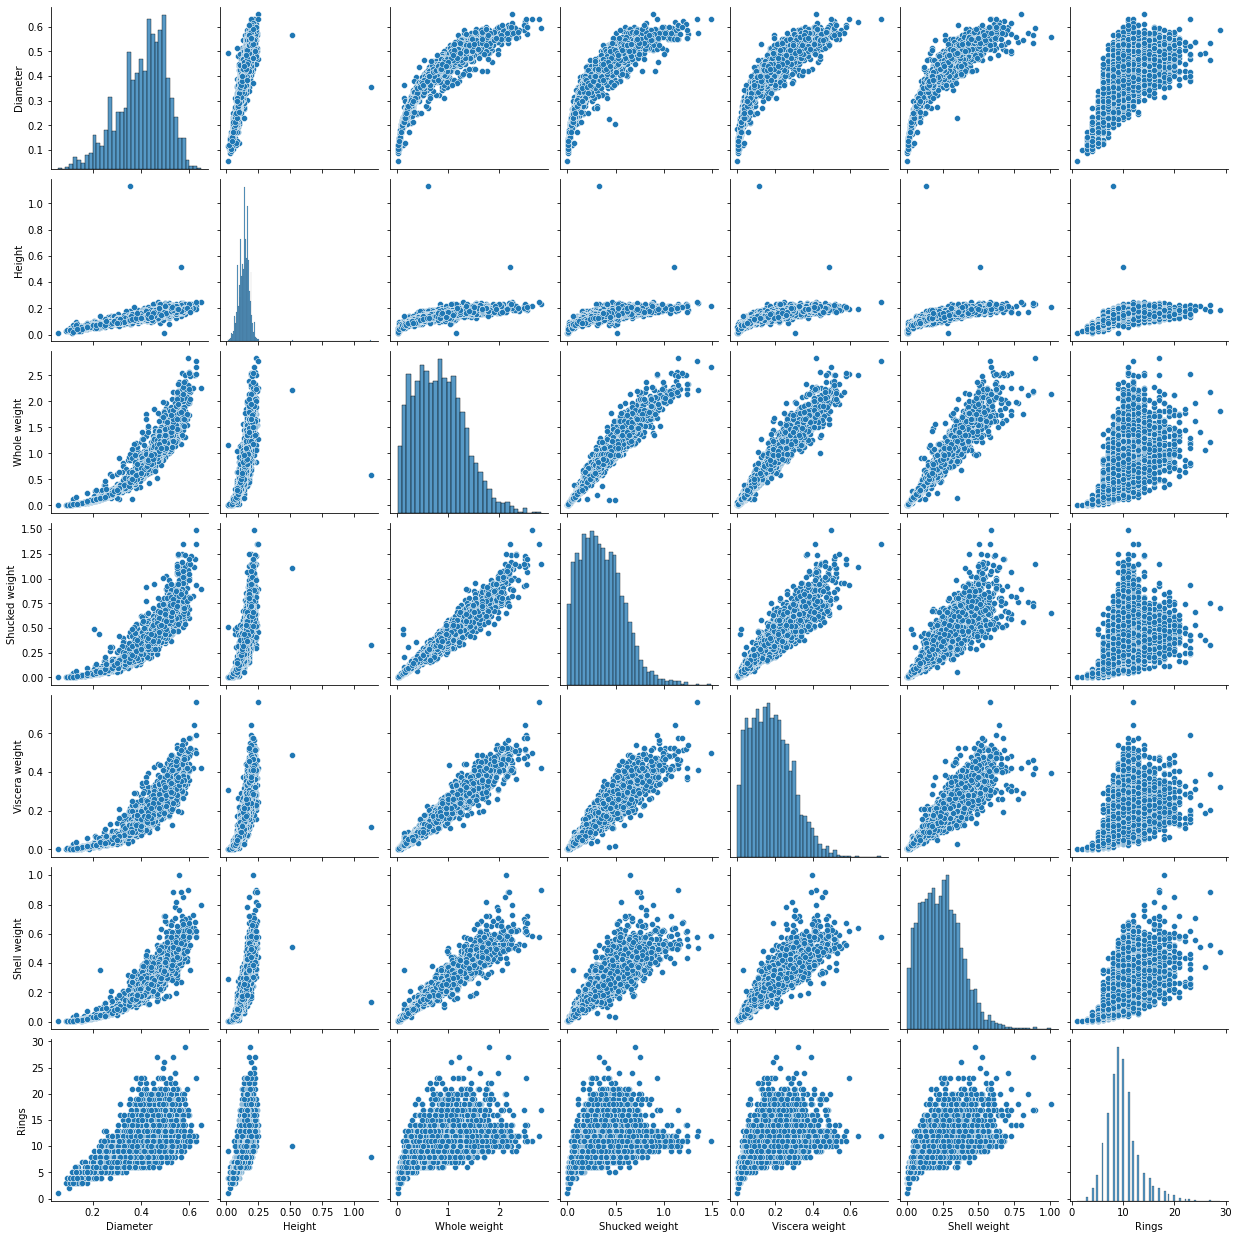

In [36]:
#showing pair plot in one frame
sns.pairplot(df_new)

# Removing outliers & Skewness 

Diameter             AxesSubplot(0.125,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Shucked weight    AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.327174,0.125;0.168478x0.343182)
Rings                AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

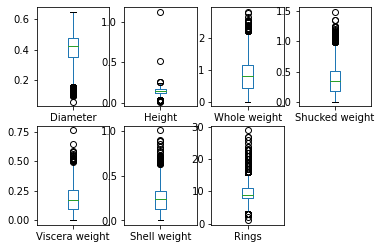

In [37]:
df_new.plot(kind="box",subplots=True,layout=(2,4))

there is oulier in all columns

In [38]:
df_new.skew()

Diameter         -0.609198
Height            3.167107
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

we have to correct skewness as well (values are more than +0.5 and less than -0.5)

In [39]:
#Removing the Outliers through IQR method
def removeOutlier(col):
    sorted(col)
    qua1,qua2=col.quantile([0.25,0.75])
    IQR=qua2 - qua1
    lowerRange = qua1- (1.5*IQR)
    upperRange = qua2+(1.5*IQR)
    return lowerRange, upperRange

In [40]:
columns=["Diameter","Height","Whole weight","Shucked weight", "Viscera weight", "Shell weight","Rings"]
for i in df_new[columns]:
    lowScore, highScore= removeOutlier(df_new[i])
    df_new[i]=np.where(df_new[i]>highScore,highScore,df_new[i])
    df_new[i]=np.where(df_new[i]<lowScore,lowScore,df_new[i])

Diameter             AxesSubplot(0.125,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Shucked weight    AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.327174,0.125;0.168478x0.343182)
Rings                AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

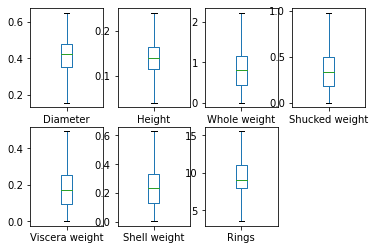

In [41]:
df_new.plot(kind="box",subplots=True,layout=(2,4))
#outlier is removed now

now we can see there is no outliers in any column

In [42]:
df_new.skew()

#Skewness almost resolved

Diameter         -0.548711
Height           -0.213749
Whole weight      0.468875
Shucked weight    0.546594
Viscera weight    0.517749
Shell weight      0.458793
Rings             0.353772
dtype: float64

we can see here there is no skewness in any column

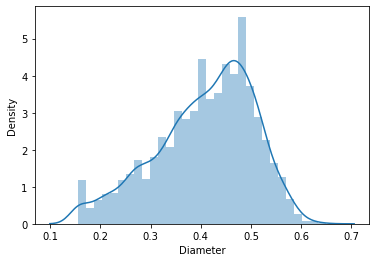

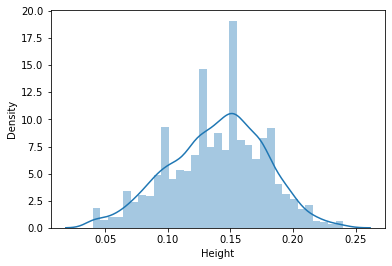

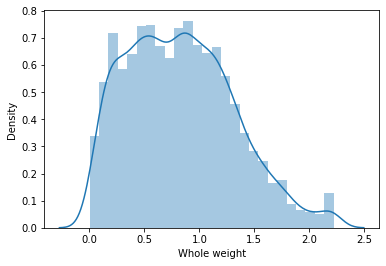

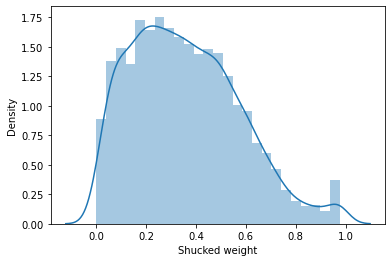

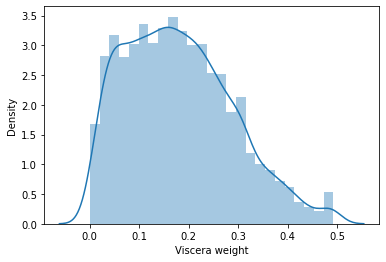

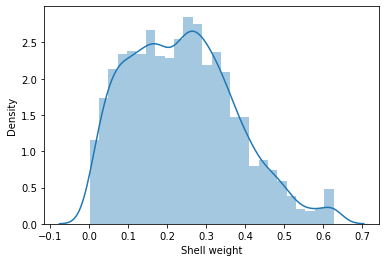

In [43]:
columns = ["Diameter","Height","Whole weight","Shucked weight", "Viscera weight", "Shell weight"]

for i in df_new[columns]:
    plt.figure()
    sns.distplot(df_new[i])
    
# checking skewness through the graph
# skewness almost resolved

In [44]:
#Checking and compairing shape of datasets
print(df.shape)
print(df_new.shape)
#row are remain same and only columns dropped

(4177, 9)
(4177, 7)


As we can see that old dataset shape was- column-4177, rows-9, and after removing outliers the shaep of new dataset is column-4177, rows-7

In [45]:
df=df_new

# Model Train and Test

In [46]:
# creating in for of input (x) and output (y)

x=df.drop(columns=["Rings"])
y=df[["Rings"]]

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3258, 6)
(919, 6)
(3258, 1)
(919, 1)


In [48]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [49]:
pred=lm.predict(x_test)
print("Predicted value and actual value", pred,y_test)

Predicted value and actual value [[10.44488819]
 [ 7.51416252]
 [ 8.99753818]
 [ 7.97887965]
 [10.7560713 ]
 [ 9.39225445]
 [ 7.82089471]
 [11.34597017]
 [ 8.26226215]
 [13.74335969]
 [ 8.87949299]
 [ 7.99607444]
 [ 8.42223863]
 [ 9.8930665 ]
 [ 8.85205504]
 [10.56950252]
 [ 5.42356629]
 [10.88214239]
 [ 8.37165751]
 [10.88607943]
 [10.74581996]
 [11.11265195]
 [ 4.98420163]
 [ 7.96141126]
 [12.30722822]
 [10.11487162]
 [ 8.44253985]
 [15.71797701]
 [ 9.45977889]
 [11.3053106 ]
 [10.07409027]
 [ 8.86036383]
 [10.0354836 ]
 [ 7.71459775]
 [10.47957453]
 [ 6.63213291]
 [11.79822131]
 [ 5.0879379 ]
 [11.202028  ]
 [12.54328107]
 [ 9.46974211]
 [ 6.89062308]
 [ 8.89144856]
 [ 5.66771683]
 [ 9.36914189]
 [ 8.87859644]
 [ 7.7872537 ]
 [ 5.53524968]
 [ 8.80829927]
 [ 8.95445664]
 [10.19394059]
 [ 6.51073084]
 [ 5.6911403 ]
 [12.77057122]
 [ 9.1022559 ]
 [ 8.75459517]
 [11.1279637 ]
 [ 7.54484245]
 [ 9.6480207 ]
 [ 9.82727437]
 [10.13729249]
 [ 8.66772078]
 [ 7.17027115]
 [ 6.07629399]
 [ 9.85

In [50]:
lm.coef_

array([[ 12.04796024,  21.92205245,   5.51401124, -15.6754481 ,
         -5.83657131,   7.49664548]])

In [51]:
lm.intercept_

array([2.08922826])

In [52]:
#finding r2 score and mean squar error in model 

print("error:")

print("Mean absolute error:", mean_absolute_error(y_test, pred))
print("Mean squared error:", mean_squared_error(y_test,pred))

print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))


error:
Mean absolute error: 1.4337896550177065
Mean squared error: 3.4837348377326824
Root Mean Squared Error: 1.8664765837622186


In [53]:
print(r2_score(y_test,pred))

0.5371214224396146


In [54]:
td=np.array([0.420, 0.135, 0.6770, 0.2565, 0.1415, 0.2100])
td.shape

(6,)

In [55]:
lm.predict([td])

array([[10.56950252]])

# Saving the model

In [56]:
joblib.dump(lm,"abalone.obj")

['abalone.obj']

In [57]:
abalonefile=joblib.load("abalone.obj")
abalonefile.predict(x_train)

array([[ 7.58786429],
       [ 7.47056754],
       [10.40899744],
       ...,
       [11.19911943],
       [17.43736346],
       [11.50689106]])